In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

import tensorflow as tf

from tensorflow.keras import models #import build models
from tensorflow.keras import layers #import layer methods

#import regularisation methods
from keras import optimizers
from tensorflow.keras import optimizers
from keras import losses
from keras import regularizers
import keras

Using TensorFlow backend.


In [3]:
gas_data_df = pd.read_csv("monthly.csv")

In [4]:
gas_data_df.head()

,Month,Price
0,1997-01,3.45
1,1997-02,2.15
2,1997-03,1.89
3,1997-04,2.03
4,1997-05,2.25


In [5]:
gas_data_df['Month'] = pd.to_datetime(gas_data_df['Month'], format='%Y-%m')
gas_data_df.set_index('Month', inplace=True)

<AxesSubplot:xlabel='Month'>

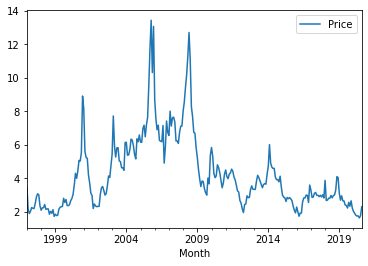

In [6]:
gas_data_df.plot.line()

In [7]:
gas_data_df.head().append(gas_data_df.tail())

,Price
Month,
1997-01-01,3.45
1997-02-01,2.15
1997-03-01,1.89
1997-04-01,2.03
1997-05-01,2.25
2020-04-01,1.74
2020-05-01,1.75
2020-06-01,1.63
2020-07-01,1.77


In [8]:
train_data = gas_data_df['1997-01-01':'2019-12-31']
test_data = gas_data_df['2020-01-01':]

In [9]:
train_data['Price'].shape

(276,)

In [10]:
test_data['Price'].shape

(8,)

Single Neural Network (SNN)

In [11]:
def windowed_dataset(data_series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(data_series)
    dataset = dataset.window(window_size + 1, shift = 1, drop_remainder = True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    return dataset

In [16]:
window_size = 1
batch_size = 32
shuffle_buffer_size = 1000
data_series = np.concatenate((train_data, test_data), axis = 0)

dataset = windowed_dataset(data_series, window_size, batch_size, shuffle_buffer_size)

In [17]:
l0 = tf.keras.layers.Dense(1, input_shape=[window_size])
model = tf.keras.models.Sequential([l0])

In [19]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-6, momentum=0.9))
model.fit(dataset,epochs=20,verbose=0)
#print(data_series)
print("Layer weights {}".format(l0.get_weights()))

2022-04-29 20:08:23.307844: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]
2022-04-29 20:08:23.550943: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]
2022-04-29 20:08:23.809193: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]
2022-04-29 20:08:24.066970: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]
2022-04-29 20:08:24.307003: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]
2022-04-29 20:08:24.553973: W tensorflow/core/comm

Layer weights [array([[0.92641145]], dtype=float32), array([0.32518005], dtype=float32)]


2022-04-29 20:08:27.825381: W tensorflow/core/common_runtime/base_collective_executor.cc:216] BaseCollectiveExecutor::StartAbort Out of range: End of sequence
	 [[{{node IteratorGetNext}}]]
